In [5]:
using LinearAlgebra
using SparseArrays
using Plots
using Polynomials

In [2]:
function BVP1D(L::Float64,c::Float64,d::Float64,x::Vector{Float64})
    # Purpose: Solve second-order boundary value problem using FEM.
    # Author(s): Clara Hollenbeck
    # INPUT PARAMETERS
    # L : Domain length
    # c : Left boundary condition
    # d : Right boundary condition
    # x : 1D mesh vector x(1:{M})
    
    ## GLOBAL ASSEMBLY
    # Assemble A (the upper triangle only) and b. (Algorithm 1)
    M = length(x)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        h = x[i+1] - x[i]
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0

    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end

function UBVP1D(L::Float64,c::Float64,d::Float64,M::Int64)
    #Uniform version of the function above.
    x = LinRange(0,L,M)
    h = L/(M-1)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        k1 = 1/h + h/3
        k2 = -1/h + h/6
    
        A[i,i] += k1
        A[i, i+1] += k2
        A[i+1, i] += k2
        A[i+1,i+1] += k1
    end
    
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0
 
    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end


UBVP1D (generic function with 1 method)

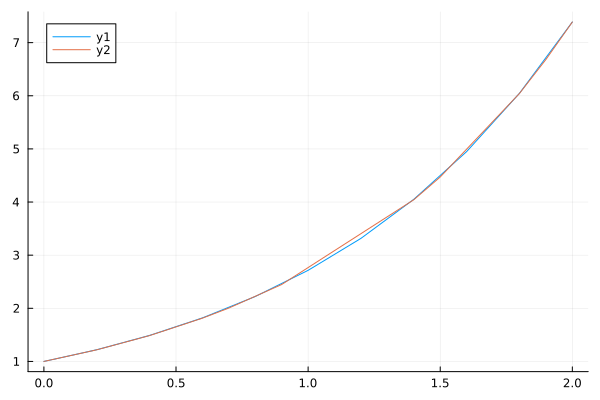

In [3]:
x = [0.0, 0.2, 0.4, 0.6, 0.7, 0.9, 1.4, 1.5, 1.8, 1.9, 2.0]


u1 = UBVP1D(2.0, 1.0, exp(2), 11)
u2 = BVP1D(2.0, 1.0, exp(2), x)

plot(LinRange(0,2,11), u1)
plot!(x,u2)

In [4]:
function uhat(x::Float64,u::Vector{Float64}, xs::Vector{Float64})
    #Evaluates the uhat function in x
    # u is the array of the approximated u values.
    # x is the value where we want to evaluate the function.
    idx = max(searchsortedfirst(xs, x) - 1, 1)

    h = xs[idx + 1] - xs[idx]
    N1 = (1 - (x - xs[idx])/h)
    N2 = (x - xs[idx])/h

    return u[idx]*N1 + u[idx + 1]*N2
end

function uhat(x::Vector{Float64}, u::Vector{Float64}, xs::Vector{Float64})
    return uhat.(x, Ref(u), Ref(xs))
end



uhat (generic function with 2 methods)

In [5]:
function ConvertionDegree(L,c,d,N)
    x = collect(LinRange(0,L,10000))
    errors = zeros(N-2)
    dist = zeros(N-2)
    for i=3:N
        M = i*N
        dist[i-2] = L/(M-1)
        us = UBVP1D(L, c, d, M)
        xs = collect(LinRange(0,L,M))
        uhats = uhat(x, us, xs)
 
        errors[i-2] = maximum(abs,uhats - exp.(x))
    end

    display(plot(dist[50:(N-3)], errors[50:(N-3)], xaxis=:log10, yaxis=:log10))

    p = fit(log10.(dist[50:(N-3)]), log10.(errors[50:(N-3)]), 1)[1]

    return p
end

ConvertionDegree (generic function with 1 method)

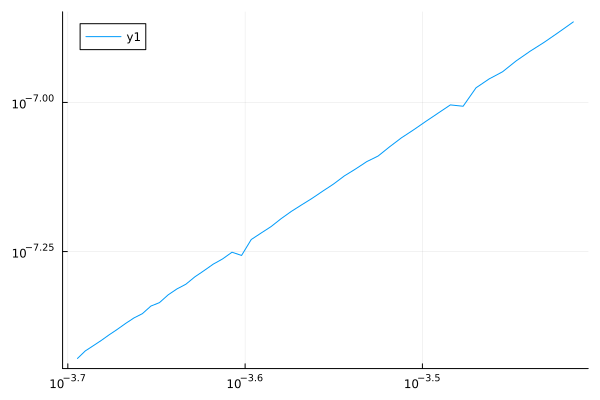

1.9985959715339099

In [6]:
p = ConvertionDegree(2.0, 1.0, exp(2), 100)

print(p)


# Exercise 1.5

## C

 ### d


[0.0, 0.00041815006634922944, 0.0008357164062228215, 0.001252698435017352, 0.001669095567544094, 0.0020849072180281402, 0.002500132800107963, 0.0029147717268347122, 0.0033288234106718644, 0.003742287263494345, 0.004155162696588174, 0.00456744912064968, 0.004979145945785059, 0.005390252581509582, 0.005800768436747511, 0.006210692919830693, 0.0066200254384988205, 0.007028765399898031, 0.007436912210581074, 0.007844465276506186, 0.008251424003036717, 0.008657787794940454, 0.00906355605638915, 0.009468728190957594, 0.009873303601623576, 0.010277281690766775, 0.010680661860168472, 0.01108344351101052, 0.011485626043875406, 0.0118872088587453, 0.012288191355001182, 0.01268857293142265, 0.013088352986187317, 0.013487530916869668, 0.013886106120441506, 0.014284077993270073, 0.014681445931118368, 0.015078209329144224, 0.015474367581899552, 0.015869920083330293, 0.01626486622677507, 0.016659205404965065, 0.017052937010023157, 0.017446060433463625, 0.01783857506619124, 0.018230480298500856, 0.018

 0.12192998308093506, 0.12198102400879213, 0.12203111354957458, 0.12208025075046669, 0.12212843465769768, 0.1221756643165417, 0.12222193877131732, 0.12226725706538533, 0.12231161824114883, 0.12235502134005166, 0.12239746540257801, 0.12243894946825046, 0.12247947257563035, 0.12251903376231599, 0.1225576320649413, 0.12259526651917624, 0.12263193615972434, 0.12266764002032254, 0.12270237713374027, 0.12273614653177806, 0.12276894724526677, 0.12280077830406694, 0.1228316387370672, 0.12286152757218355, 0.12289044383635883, 0.12291838655556103, 0.12294535475478269, 0.12297134745804011, 0.12299636368837175, 0.12302040246783796, 0.1230434628175196, 0.12306554375751716, 0.12308664430694966, 0.12310676348395366, 0.12312590030568282, 0.1231440537883059, 0.12316122294700699, 0.12317740679598344, 0.12319260434844514, 0.12320681461661448, 0.12322003661172376, 0.12323226934401527, 0.12324351182274046, 0.1232537630561581, 0.123263022051534, 0.1232712878151393, 0.12327855935225046, 0.12328483566714732, 

 0.04619901799163395, 0.045752159725722774, 0.04530385142561422, 0.04485409163909615, 0.0444028789125015, 0.043950211790707905, 0.04349608881713507, 0.04304050853374486, 0.04258346948103764, 0.04212497019805317, 0.04166500922236782, 0.04120358509009281, 0.04074069633587363, 0.0402763414928885, 0.039810519092846164, 0.03934322766598508, 0.038874465741072006, 0.03840423184539932, 0.03793252450478568, 0.03745934224357239, 0.03698468358462359, 0.03650854704932349, 0.03603093115757572, 0.035551834427801854, 0.035071255376939225, 0.034589192520440126, 0.034105644372269595, 0.033620609444905525, 0.03313408624933467, 0.032646073295053535, 0.03215656909006537, 0.031665572140879505, 0.03117308095250948, 0.030679094028471132, 0.03018360987078217, 0.02968662697996005, 0.029188143855019888, 0.02868815899347399, 0.028186670891330312, 0.027683678043089688, 0.02717917894174604, 0.02667317207878328, 0.02616565594417486, 0.025656629026382327, 0.025146089812352557, 0.024634036787517966, 0.024120468435793

 0.4004004004004004, 0.4014014014014014, 0.4024024024024024, 0.4034034034034034, 0.4044044044044044, 0.40540540540540543, 0.4064064064064064, 0.4074074074074074, 0.4084084084084084, 0.4094094094094094, 0.41041041041041043, 0.4114114114114114, 0.4124124124124124, 0.4134134134134134, 0.4144144144144144, 0.41541541541541543, 0.4164164164164164, 0.4174174174174174, 0.4184184184184184, 0.4194194194194194, 0.42042042042042044, 0.4214214214214214, 0.42242242242242245, 0.42342342342342343, 0.4244244244244244, 0.42542542542542544, 0.4264264264264264, 0.42742742742742745, 0.42842842842842843, 0.4294294294294294, 0.43043043043043044, 0.4314314314314314, 0.43243243243243246, 0.43343343343343343, 0.4344344344344344, 0.43543543543543545, 0.4364364364364364, 0.43743743743743746, 0.43843843843843844, 0.4394394394394394, 0.44044044044044045, 0.44144144144144143, 0.44244244244244246, 0.44344344344344344, 0.4444444444444444, 0.44544544544544545, 0.44644644644644643, 0.44744744744744747, 0.448448448448448

, 0.9127477715504583, 0.9137313862126311, 0.9147131704140798, 0.9156929314410601, 0.9166704562906253, 0.9176455095345479, 0.9186178309583519, 0.919587132951777, 0.9205530976245087, 0.9215153736182472, 0.9224735725831458, 0.9234272652832834, 0.9243759772921152, 0.9253191842347338, 0.9262563065292281, 0.9271867035744042, 0.9281096673255811, 0.9290244151940347, 0.9299300821988863, 0.9308257122927287, 0.9317102487740001, 0.9325825236899593, 0.9334412461239884, 0.9342849892497652, 0.9351121760224792, 0.9359210633635956, 0.9367097246805672, 0.9374760305461949, 0.9382176273438801, 0.9389319136646183, 0.9396160142190286, 0.9402667510028041, 0.9408806114264137, 0.9414537130894519, 0.9419817648463754, 0.9424600237731809, 0.9428832476034685, 0.9432456421568991, 0.9435408032328385, 0.9437616523864752, 0.9439003659433468, 0.943948296540406, 0.9438958864068093, 0.9437325715147715, 0.9434466756392738, 0.9430252932642135, 0.9424541601607322, 0.9417175103398288, 0.9407979179447213, 0.9396761224973932, 

, 0.0942521507460593, 0.0][0.0, 0.001001001001001001, 0.002002002002002002, 0.003003003003003003, 0.004004004004004004, 0.005005005005005005, 0.006006006006006006, 0.007007007007007007, 0.008008008008008008, 0.009009009009009009, 0.01001001001001001, 0.011011011011011011, 0.012012012012012012, 0.013013013013013013, 0.014014014014014014, 0.015015015015015015, 0.016016016016016016, 0.01701701701701702, 0.018018018018018018, 0.01901901901901902, 0.02002002002002002, 0.021021021021021023, 0.022022022022022022, 0.023023023023023025, 0.024024024024024024, 0.025025025025025027, 0.026026026026026026, 0.02702702702702703, 0.028028028028028028, 0.02902902902902903, 0.03003003003003003, 0.031031031031031032, 0.03203203203203203, 0.03303303303303303, 0.03403403403403404, 0.035035035035035036, 0.036036036036036036, 0.037037037037037035, 0.03803803803803804, 0.03903903903903904, 0.04004004004004004, 0.04104104104104104, 0.042042042042042045, 0.043043043043043044, 0.044044044044044044, 0.045045045045

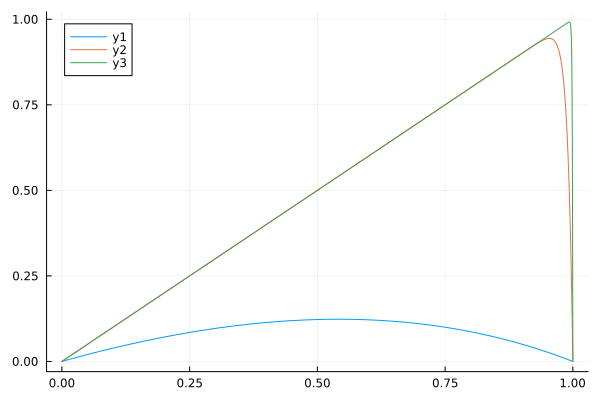

, 0.4944944944944945, 0.4954954954954955, 0.4964964964964965, 0.4974974974974975, 0.4984984984984985, 0.4994994994994995, 0.5005005005005005, 0.5015015015015015, 0.5025025025025025, 0.5035035035035035, 0.5045045045045045, 0.5055055055055055, 0.5065065065065065, 0.5075075075075075, 0.5085085085085085, 0.5095095095095095, 0.5105105105105106, 0.5115115115115115, 0.5125125125125125, 0.5135135135135135, 0.5145145145145145, 0.5155155155155156, 0.5165165165165165, 0.5175175175175175, 0.5185185185185185, 0.5195195195195195, 0.5205205205205206, 0.5215215215215215, 0.5225225225225225, 0.5235235235235235, 0.5245245245245245, 0.5255255255255256, 0.5265265265265265, 0.5275275275275275, 0.5285285285285285, 0.5295295295295295, 0.5305305305305306, 0.5315315315315315, 0.5325325325325325, 0.5335335335335335, 0.5345345345345346, 0.5355355355355356, 0.5365365365365365, 0.5375375375375375, 0.5385385385385385, 0.5395395395395396, 0.5405405405405406, 0.5415415415415415, 0.5425425425425425, 0.5435435435435435

In [7]:

phi = 1

function u_a(x:: Vector{Float64}, epsilon::Float64) 
    return 1/phi .* (x .- (exp.((x.-1).*phi./epsilon) .- exp(-phi/epsilon))/(1 - exp(-phi/epsilon)))
end 

x = collect(range(0,1,1000))

epsilon = [1.0, 0.01, 0.001]

p = plot()
for i in 1:3
    print(u_a(x,epsilon[i]))
    plot!(x, u_a(x, epsilon[i]))
end
display(p)

### e

In [8]:
function BVP1D_2(L::Float64,c::Float64,d::Float64, e:: Float64, x::Vector{Float64})
    # Purpose: Solve second-order boundary value problem using FEM.
    # Author(s): Clara Hollenbeck
    # INPUT PARAMETERS
    # L : Domain length
    # c : Left boundary condition
    # d : Right boundary condition
    # x : 1D mesh vector x(1:{M})
    
    ## GLOBAL ASSEMBLY
    # Assemble A (the upper triangle only) and b. (Algorithm 1)
    M = length(x)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 2:(M-1)
        h= x[i+1] - x[i]
        h1 = x[i] - x[i-1]
        k11 = e/h + 1/2
        k22 = e/h - 1/2
        k12 = -e/h+1/2
        k21 = e/h+1/2
    
        A[i,i] += k11
        A[i, i+1] += k12
        A[i+1, i] += k21
        A[i+1,i+1] += k22
        b[i] = h1*5/6 + h*5/6
    end
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0

    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end

function UBVP1D_2(L,c,d,e,M)
    #Uniform version of the function above.
    x = LinRange(0,L,M)
    h = L/(M-1)
    A = spzeros(M,M)
    b = zeros(M)

    for i = 1:(M-1)
        h = L/(M-1)
        k11 = e/h + 1/2
        k22 = e/h - 1/2
        k12 = -e/h+1/2
        k21 = e/h+1/2
    
        A[i,i] += k11
        A[i, i+1] += k12
        A[i+1, i] += k21
        A[i+1,i+1] += k22
        b[i] = h*5/6 + h*5/6
    end
    
    # IMPOSE BOUNDARY CONDITIONS
    b[1] = c
    b[2] -= A[1,2]*c
    A[1,1] = 1
    A[1,2] = 0
    A[2,1] = 0
 
    b[M] = d
    b[M-1] -= A[M-1, M]*d
    A[M,M] = 1
    A[M-1,M] = 0
    A[M,M-1] = 0

    # SOLVE SYSTEM
    u = A\b

    return u
end


UBVP1D_2 (generic function with 1 method)

In [9]:
function ConvertionDegree_2(L, c, d, e, N)
    x = collect(LinRange(0,L,10000))
    errors = zeros(N-2)
    dist = zeros(N-2)
    for i=3:N
        M = i*N
        dist[i-2] = L/(M-1)
        us = UBVP1D_2(L, c, d, e, M)
        xs = collect(LinRange(0,L,M))
        uhats = uhat(x, us, xs)
 
        errors[i-2] = maximum(abs,uhats - u_a(x,e))
    end

    display(plot(dist, errors, xaxis=:log10, yaxis=:log10))

    p = fit(log10.(dist[50:(N-2)]), log10.(errors[50:(N-2)]), 1)[1]

    return p
end

ConvertionDegree_2 (generic function with 1 method)

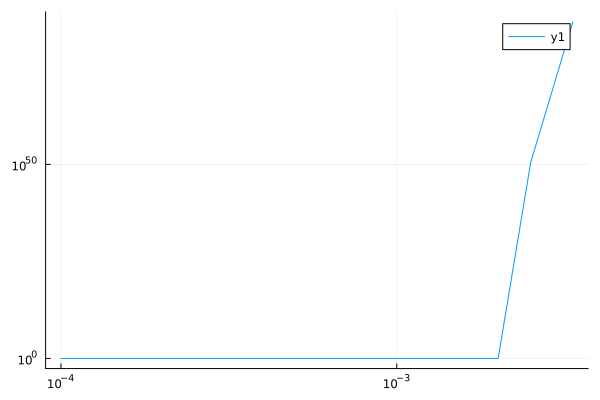

-2.969281974116685e-5

In [11]:
epsilon = [1.0, 0.01, 0.001]



p = ConvertionDegree_2(1, 0, 0, 0.001, 100)

print(p)


# Exercise 1.6

In [3]:
function fun(x)
    return exp(-800*(x-0.4)^2) + 0.25*exp(-40*(x-0.8)^2)
end

fun (generic function with 1 method)

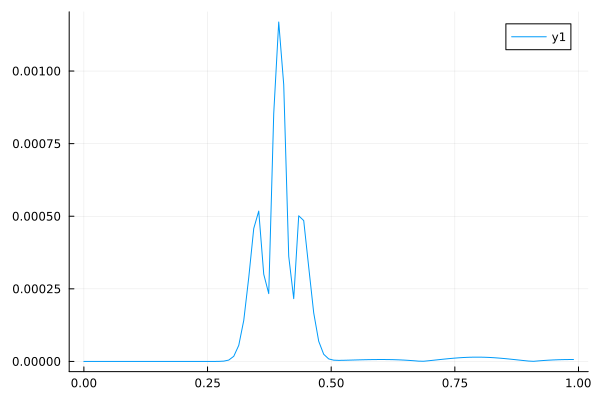

In [6]:
function compute_error_decrease(fun::Function, VX::Vector{Float64}, EToV::Matrix{Int64})
    # Computes the decrease of error in the points in VX given a function func.
    M = length(VX)
    err = zeros(M-1)
    for i in 1:M-1
        h = VX[EToV[i , 2]]-VX[i]
        
        u1 = fun(VX[EToV[i , 1]] + h/2)
        u2 = fun(VX[EToV[i , 1]])
        u3 = fun(VX[EToV[i , 1]] + h)

        err[i] = (sqrt(3)*sqrt((h *(-2 * u1 + u2 + u3)^2)))/6
    end

    return err
end


u_anal(x) = exp(-800*(x - 0.4)^2) + 0.25*exp(-40*(x - 0.8)^2)
M = 100
VX = collect(range(0, 1, M))
EToV = hcat(1:M-1, 2:M)


err_vec = compute_error_decrease(u_anal, VX, EToV)

plot(VX[1:M-1], err_vec)

In [7]:
function  refine_marked(EToVcoarse::Matrix{Int64}, xcoarse:: Vector{Float64}, idxMarked :: Vector{Int64})
    
    N = length(idxMarked)
    M = length(xcoarse)

    xfine = zeros(N+M)
    EToVfine = zeros(Int64, N+M-1, 2)

    idx = 1
    offset = 0
    X = idxMarked[idx]
   

    for i in 1:M-1
        xfine[i+offset] = xcoarse[EToVcoarse[i, 1]]

        if X == EToVcoarse[i , 2]
            xfine[i + offset + 1] = (xcoarse[EToVcoarse[i, 2]] + xcoarse[EToVcoarse[i, 1]])/2 
            EToVfine[i + offset, 1] = i + offset
            EToVfine[i + offset, 2] = i + offset + 1
            EToVfine[i+1+ offset, 1] = i + offset +1
            EToVfine[i+1+ offset, 2] = i + offset +2
            offset += 1

            if idx < N
                idx +=1
                X = idxMarked[idx]
            end

        else
            xfine[i + offset] = xcoarse[EToVcoarse[i, 1]]
            EToVfine[i+ offset , 1] = i + offset
            EToVfine[i+ offset, 2] = i + 1 + offset
        end

        xfine[end] = xcoarse[EToVcoarse[end, 2]] 
        EToVfine[end, 1] = EToVcoarse[M-1, 1] + offset
        EToVfine[end, 2] = EToVcoarse[M-1, 2] + offset
    end

    return EToVfine, xfine
end

refine_marked (generic function with 1 method)

In [8]:
function AMR(fun ::Function, a::Float64)
    VX = [0.0, 1.0]
    EToV = [1 2]
    tol = 10^(-4)

    iteration = 100

    for i in 1:iteration
        display(i)
        err = compute_error_decrease(fun, VX, EToV)
        idxMarked = findall(VX .> a*tol)

        if length(idxMarked) == 0
            break
        else
            EToV, VX = refine_marked(EToV, VX, idxMarked)
        end
    end
    return VX, EToV
end

    

AMR (generic function with 1 method)

In [9]:
VX, EVoT = AMR(fun, 1.0)